In [1]:
from sklearn.metrics import confusion_matrix  # for confusion matrix
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from IPython.display import display
from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('income_train.csv')
test = pd.read_csv('income_test.csv')
print(train.shape)
print(test.shape)
display(train)

(26048, 15)
(6513, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,37,Self-emp-not-inc,112497,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
1,39,Private,278557,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1628,48,United-States,<=50K
2,33,Private,173858,Bachelors,13,Married-civ-spouse,Adm-clerical,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
3,35,?,120074,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,30,United-States,<=50K
4,21,Private,199915,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,34,Private,244147,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
26044,38,Private,103323,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,40,United-States,>50K
26045,24,Private,117167,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,53,United-States,<=50K
26046,24,Private,235071,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,>50K


In [3]:
train['native-country'] = train['native-country'].replace('?', np.nan)
train['workclass'] = train['workclass'].replace('?', np.nan)
train['occupation'] = train['occupation'].replace('?', np.nan)
# dropping the NaN rows now
train.dropna(how='any', inplace=True)
display(train.head())
train.shape

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,37,Self-emp-not-inc,112497,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
1,39,Private,278557,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1628,48,United-States,<=50K
2,33,Private,173858,Bachelors,13,Married-civ-spouse,Adm-clerical,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
4,21,Private,199915,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
5,20,Private,745817,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,15,United-States,<=50K


(24097, 15)

In [4]:
income = {"<=50K": 0, ">50K": 1}
train["income"] = train["income"].apply(lambda x: income[x])

In [5]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
train[['sex', 'race', 'marital-status', 'workclass', 'education', 'occupation', 'relationship', 'native-country']] = encoder.fit_transform(train[['sex', 'race', 'marital-status', 'workclass', 'education', 'occupation', 'relationship', 'native-country']], train.iloc[:,-1])

In [6]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# train[['race', 'marital-status', 'workclass', 'education', 'occupation', 'relationship', 'native-country']] = le.fit_transform(train['native-country'])

In [7]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,37,0.289090,112497,0.567892,14,0.456879,0.490926,0.458287,0.265389,0.316457,0,0,50,0.255242,1
1,39,0.221088,278557,0.266228,11,0.456879,0.225857,0.458287,0.265389,0.316457,0,1628,48,0.255242,0
2,33,0.221088,173858,0.426561,13,0.456879,0.126253,0.037344,0.277852,0.316457,0,0,40,0.397590,0
4,21,0.221088,199915,0.198869,10,0.048733,0.040519,0.014771,0.265389,0.114108,0,0,40,0.255242,0
5,20,0.221088,745817,0.198869,10,0.048733,0.304527,0.014771,0.265389,0.114108,0,0,15,0.255242,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26042,41,0.256890,342834,0.198869,10,0.108644,0.126253,0.106282,0.265389,0.114108,0,0,40,0.255242,0
26044,38,0.221088,103323,0.198869,10,0.456879,0.225857,0.458287,0.265389,0.316457,7688,0,40,0.255242,1
26045,24,0.221088,117167,0.198869,10,0.048733,0.040519,0.106282,0.265389,0.114108,0,0,53,0.255242,0
26046,24,0.221088,235071,0.058683,7,0.456879,0.225857,0.458287,0.265389,0.316457,0,0,50,0.255242,1


In [8]:
train['capital-gain'] = np.log(train['capital-gain']+1)

In [9]:
train['capital-loss'] = np.log(train['capital-loss']+1)

In [10]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,37,0.289090,112497,0.567892,14,0.456879,0.490926,0.458287,0.265389,0.316457,0.000000,0.000000,50,0.255242,1
1,39,0.221088,278557,0.266228,11,0.456879,0.225857,0.458287,0.265389,0.316457,0.000000,7.395722,48,0.255242,0
2,33,0.221088,173858,0.426561,13,0.456879,0.126253,0.037344,0.277852,0.316457,0.000000,0.000000,40,0.397590,0
4,21,0.221088,199915,0.198869,10,0.048733,0.040519,0.014771,0.265389,0.114108,0.000000,0.000000,40,0.255242,0
5,20,0.221088,745817,0.198869,10,0.048733,0.304527,0.014771,0.265389,0.114108,0.000000,0.000000,15,0.255242,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26042,41,0.256890,342834,0.198869,10,0.108644,0.126253,0.106282,0.265389,0.114108,0.000000,0.000000,40,0.255242,0
26044,38,0.221088,103323,0.198869,10,0.456879,0.225857,0.458287,0.265389,0.316457,8.947546,0.000000,40,0.255242,1
26045,24,0.221088,117167,0.198869,10,0.048733,0.040519,0.106282,0.265389,0.114108,0.000000,0.000000,53,0.255242,0
26046,24,0.221088,235071,0.058683,7,0.456879,0.225857,0.458287,0.265389,0.316457,0.000000,0.000000,50,0.255242,1


In [11]:
from sklearn.feature_selection import SelectPercentile


# задаем определенное стартовое значение для воспроизводимости результата
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(train.iloc[:,:-1]), 50))
# добавляем к данным шумовые признаки
# первые 30 признаков являются исходными, остальные 50 являются шумовыми
X_w_noise = np.hstack([train, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, train.income, random_state=0, test_size=.5)
# используем f_classif (по умолчанию)
# и SelectPercentile, чтобы выбрать 50% признаков
select_pct = SelectPercentile(percentile=14)
select_pct.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)

print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

форма массива X_train: (12048, 65)
форма массива X_train_selected: (12048, 9)


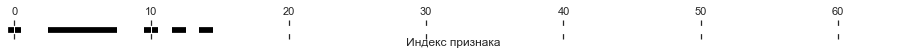

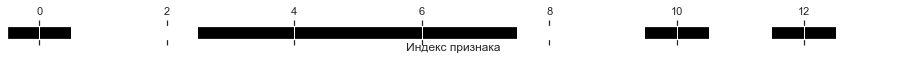

In [12]:
mask = select_pct.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");
mask = select_pct.get_support()[:14]
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.xlabel("Индекс признака");

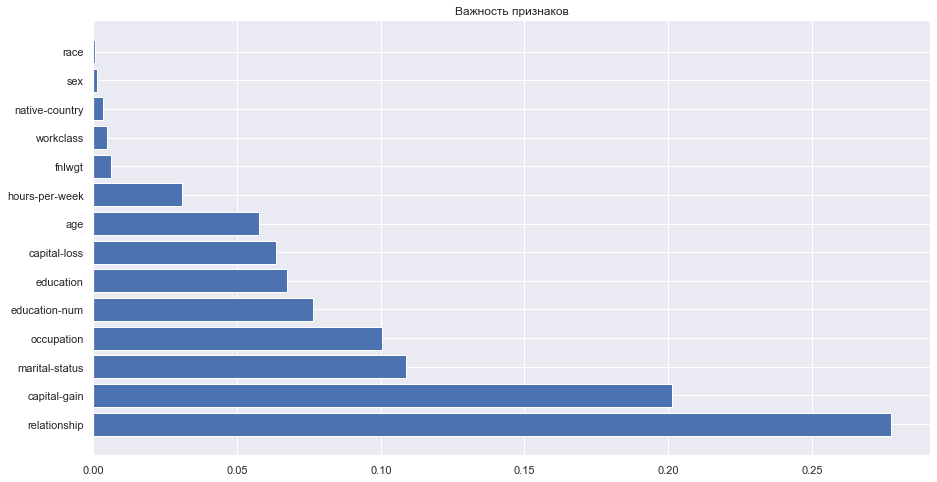

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,:-1], train.income, random_state=0, test_size=.3)

rfc = GradientBoostingClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train,y_train)

plt.figure(figsize=(15,8))
feature_names = np.array(train.iloc[:,:-1].columns)
#importance = rfc.feature_importances_

importance = np.sort(rfc.feature_importances_)
importance_name = np.argsort(rfc.feature_importances_)

plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

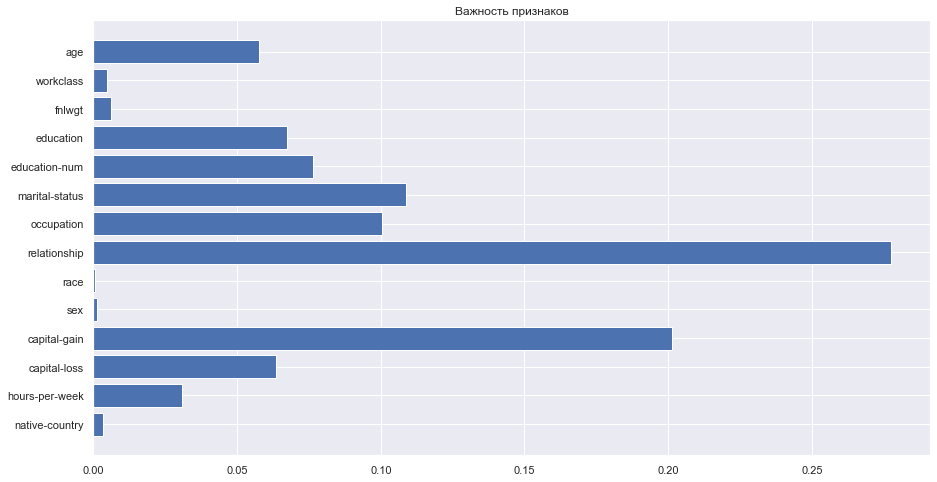

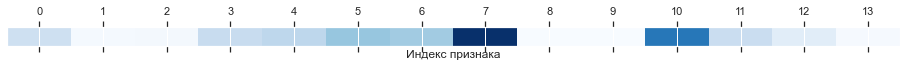

In [14]:
importance = rfc.feature_importances_

plt.figure(figsize=(15,8))
plt.barh(width=importance, y=feature_names)
plt.gca().invert_yaxis()
plt.title("Важность признаков")
plt.show()

mask = importance
plt.matshow( mask.reshape(1,-1), cmap = 'Blues', aspect=0.3)
plt.yticks([])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

Таким образом, в работу моделей не будут включены такие параметры как Раса, Пол, Страна рождения, Рабочий класс и fnlwgt, так как они имеют наименьшую значимость.